<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/%E2%80%9CWeek5_11_fajrulsantoso_ipynb%E2%80%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D-1 PERCOBAAN HISTOGRAM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


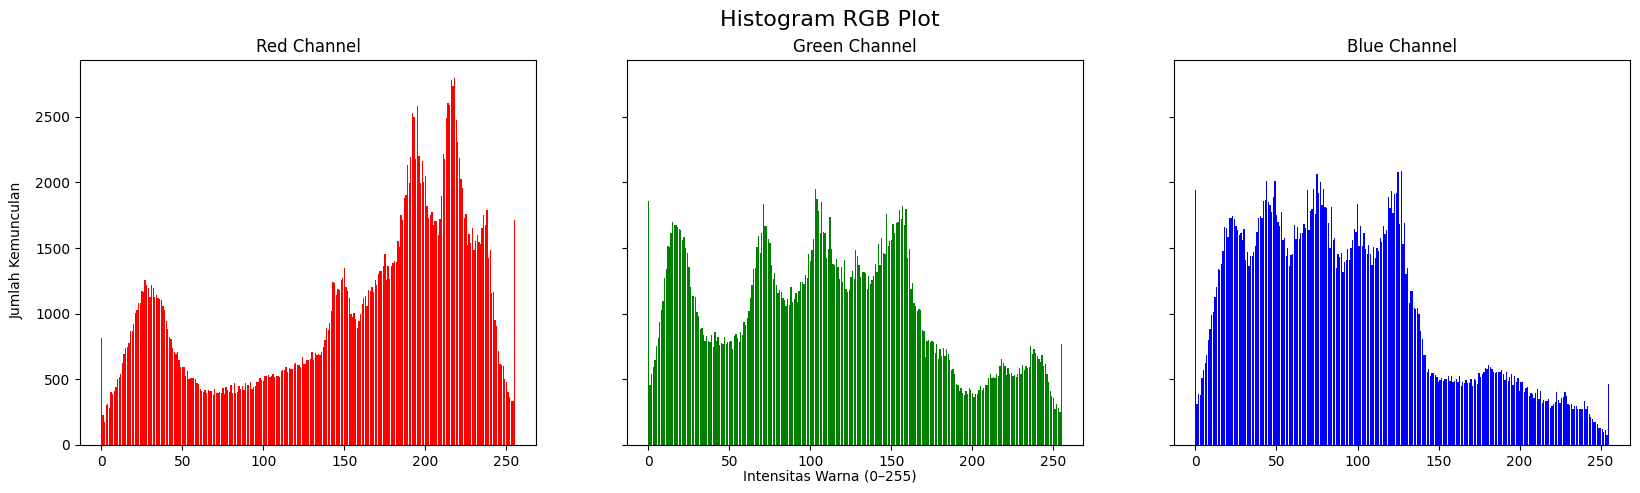

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# ===============================
# START – Mount Google Drive & Baca Gambar
# ===============================
drive.mount('/content/drive')
img = cv2.imread('/content/drive/MyDrive/Pcvk/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah ke RGB

height, width, depth = img.shape
names = np.arange(256)

# ===============================
# Inisialisasi array untuk tiap channel
# ===============================
red   = [0]*256
green = [0]*256
blue  = [0]*256

# ===============================
# Hitung jumlah kemunculan setiap pixel (manual)
# ===============================
for y in range(height):
    for x in range(width):
        r, g, b = img[y][x]
        red[r]   += 1
        green[g] += 1
        blue[b]  += 1

# ===============================
# Plot histogram RGB (3 grafik)
# ===============================
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot', fontsize=16)

# Label sumbu
fig.text(0.5, 0.04, 'Intensitas Warna (0–255)', ha='center')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

axs[0].bar(names, red,   color='red')
axs[0].set_title('Red Channel')

axs[1].bar(names, green, color='green')
axs[1].set_title('Green Channel')

axs[2].bar(names, blue,  color='blue')
axs[2].set_title('Blue Channel')

plt.show()


1. Histogram pakai numpy.histogram() dan bandingkan dengan manual

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


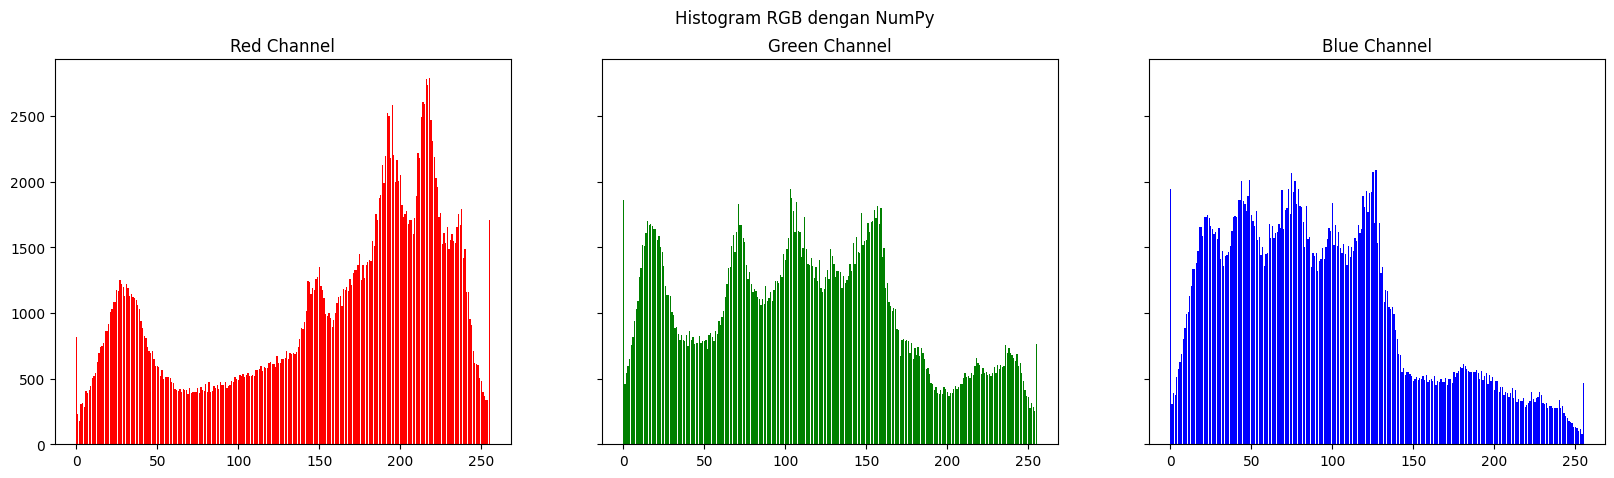

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load image (lena.jpg)
img = cv2.imread('/content/drive/MyDrive/Pcvk/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ambil channel RGB
r = img[:,:,0].flatten()
g = img[:,:,1].flatten()
b = img[:,:,2].flatten()

# Histogram pakai numpy.histogram
hist_r, bins_r = np.histogram(r, bins=256, range=(0,256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0,256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0,256))

# Plot hasil
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle("Histogram RGB dengan NumPy")

axs[0].bar(bins_r[:-1], hist_r, color='red')
axs[0].set_title("Red Channel")

axs[1].bar(bins_g[:-1], hist_g, color='green')
axs[1].set_title("Green Channel")

axs[2].bar(bins_b[:-1], hist_b, color='blue')
axs[2].set_title("Blue Channel")

plt.show()


2. Histogram KTM lama.jpg + Analisis distribusi intensitas

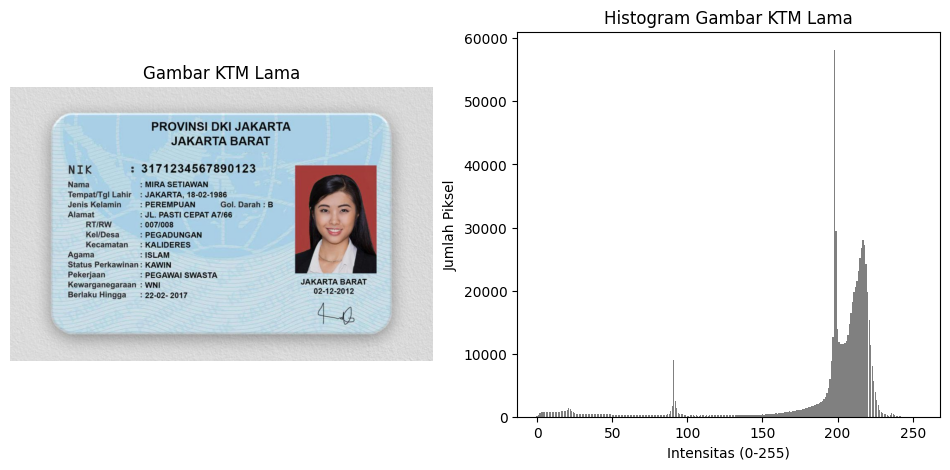

In [ ]:
# Load gambar KTM lama
ktm = cv2.imread('/content/drive/MyDrive/Pcvk/unnamed.jpg')
ktm_gray = cv2.cvtColor(ktm, cv2.COLOR_BGR2GRAY)

# Histogram grayscale
hist_ktm, bins_ktm = np.histogram(ktm_gray.flatten(), bins=256, range=(0,256))

# Plot citra asli & histogram
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(ktm, cv2.COLOR_BGR2RGB))
plt.title("Gambar KTM Lama")
plt.axis("off")

plt.subplot(1,2,2)
plt.bar(bins_ktm[:-1], hist_ktm, color='gray')
plt.title("Histogram Gambar KTM Lama")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah Piksel")

plt.show()


D-2 PERCOBAAN HISTOGRAM EQUALIZATION


In [1]:
import cv2
import matplotlib.pyplot as plt



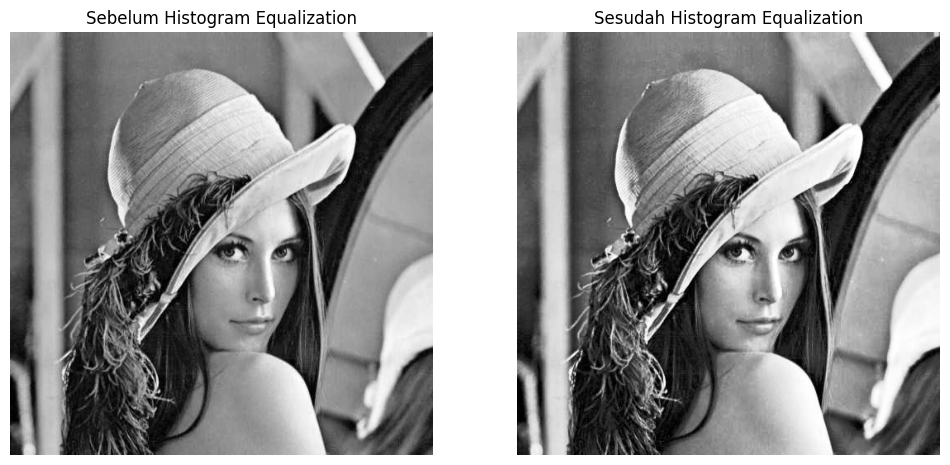

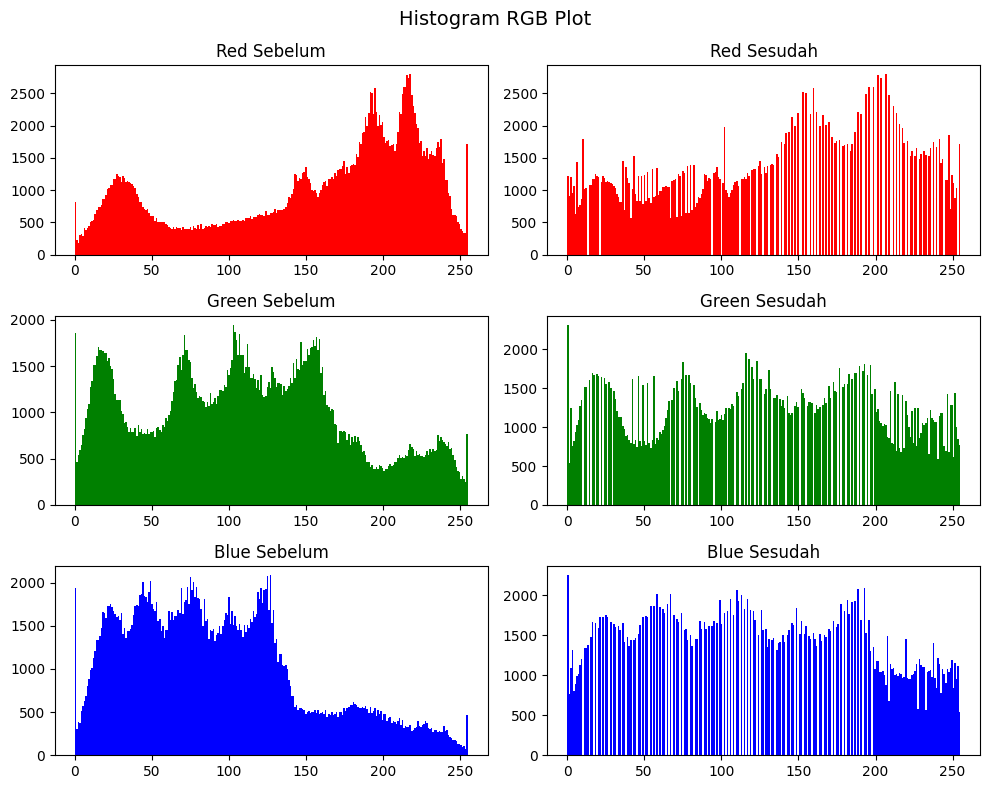

In [3]:
import cv2
import matplotlib.pyplot as plt

# 1️⃣ Baca gambar dari Google Drive
img_path = '/content/drive/MyDrive/Pcvk/lena.jpg'  # ganti dengan nama file kamu
img = cv2.imread(img_path)

# 2️⃣ Konversi dari BGR (OpenCV default) ke RGB (untuk matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3️⃣ Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4️⃣ Lakukan Histogram Equalization
equalized = cv2.equalizeHist(gray)

# 5️⃣ Tampilkan gambar sebelum & sesudah equalization
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Sebelum Histogram Equalization')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title('Sesudah Histogram Equalization')
plt.axis('off')
plt.show()

# 6️⃣ Pisahkan channel RGB
r, g, b = cv2.split(img_rgb)

# Equalize tiap channel RGB
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# 7️⃣ Tampilkan histogram RGB sebelum & sesudah equalization
plt.figure(figsize=(10,8))
plt.suptitle('Histogram RGB Plot', fontsize=14)

# Sebelum equalization
plt.subplot(3,2,1); plt.hist(r.ravel(), bins=256, color='r'); plt.title('Red Sebelum')
plt.subplot(3,2,3); plt.hist(g.ravel(), bins=256, color='g'); plt.title('Green Sebelum')
plt.subplot(3,2,5); plt.hist(b.ravel(), bins=256, color='b'); plt.title('Blue Sebelum')

# Sesudah equalization
plt.subplot(3,2,2); plt.hist(r_eq.ravel(), bins=256, color='r'); plt.title('Red Sesudah')
plt.subplot(3,2,4); plt.hist(g_eq.ravel(), bins=256, color='g'); plt.title('Green Sesudah')
plt.subplot(3,2,6); plt.hist(b_eq.ravel(), bins=256, color='b'); plt.title('Blue Sesudah')

plt.tight_layout()
plt.show()


## PERTANYAAN PRAKTIKUM D2

## Bagian 1 – Citra Lena

1.   Tujuan: Histogram Equalization + Hitung PSNR + Penjelasan hasilnya


Nilai PSNR antara citra asli dan equalized: 29.79 dB


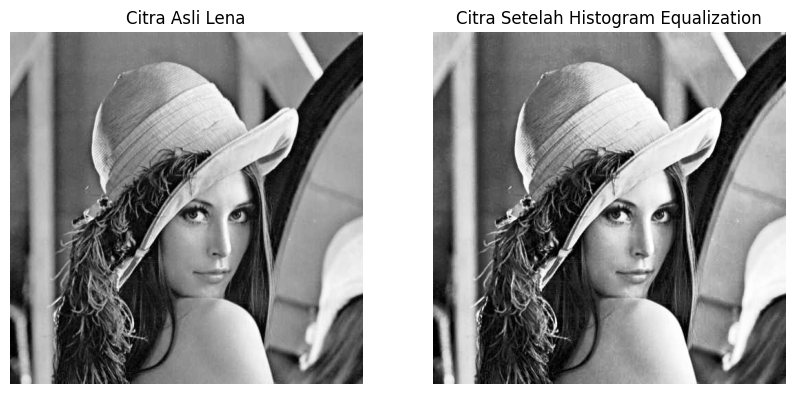

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca gambar Lena dari Google Drive ===
img_path = '/content/drive/MyDrive/Pcvk/lena.jpg'  # ganti sesuai lokasi file kamu
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 2. Lakukan Histogram Equalization ===
equalized = cv2.equalizeHist(gray)

# === 3. Fungsi PSNR ===
def psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

# === 4. Hitung nilai PSNR ===
psnr_value = psnr(gray, equalized)
print("Nilai PSNR antara citra asli dan equalized:", round(psnr_value, 2), "dB")

# === 5. Tampilkan gambar sebelum & sesudah ===
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Asli Lena')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title('Citra Setelah Histogram Equalization')
plt.axis('off')
plt.show()


## Bagian 2 – Citra KTM Lama



1.   Tujuan: Terapkan histogram equalization, tampilkan hasil & histogram




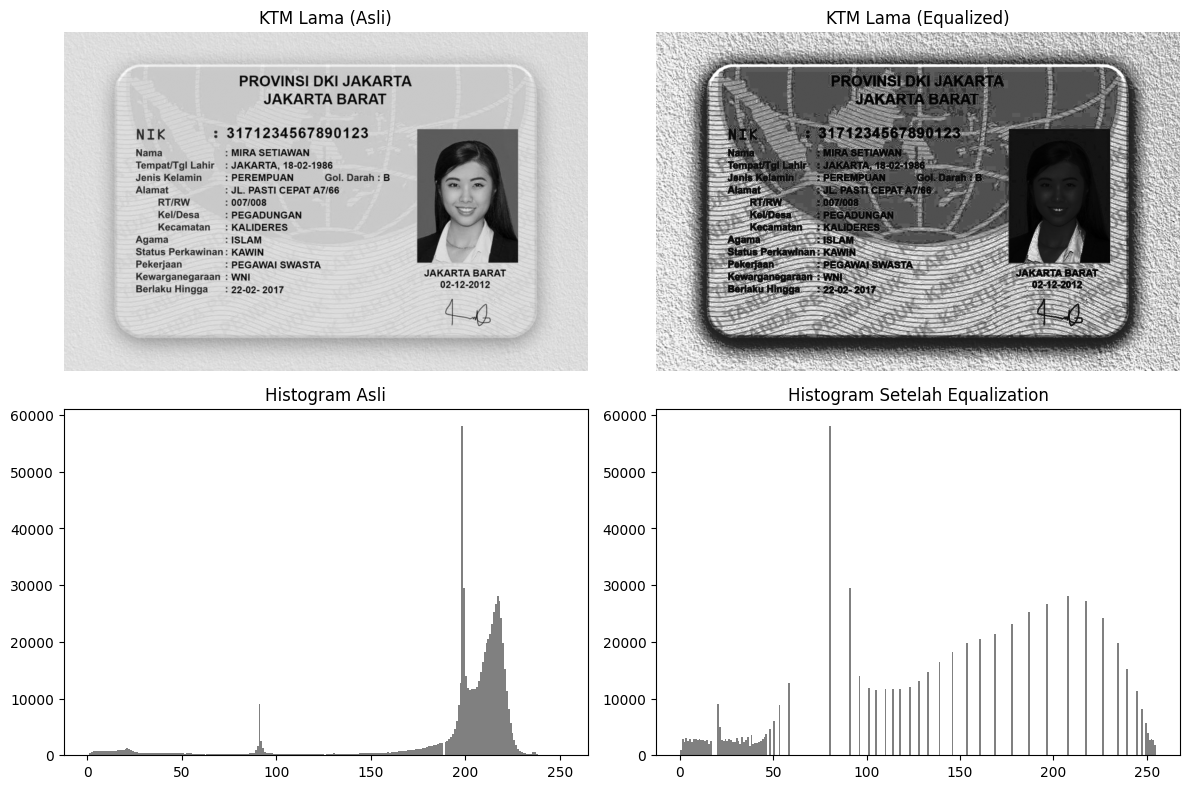

In [5]:
# === 1. Baca gambar KTM Lama ===
ktm_path = '/content/drive/MyDrive/Pcvk/unnamed.jpg'  # ganti sesuai lokasi file kamu
ktm = cv2.imread(ktm_path)
gray_ktm = cv2.cvtColor(ktm, cv2.COLOR_BGR2GRAY)

# === 2. Lakukan Histogram Equalization ===
ktm_eq = cv2.equalizeHist(gray_ktm)

# === 3. Tampilkan citra & histogram ===
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_ktm, cmap='gray')
plt.title('KTM Lama (Asli)')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(ktm_eq, cmap='gray')
plt.title('KTM Lama (Equalized)')
plt.axis('off')

plt.subplot(2,2,3)
plt.hist(gray_ktm.ravel(), bins=256, color='gray')
plt.title('Histogram Asli')

plt.subplot(2,2,4)
plt.hist(ktm_eq.ravel(), bins=256, color='gray')
plt.title('Histogram Setelah Equalization')

plt.tight_layout()
plt.show()


Nilai PSNR (Lena) → menunjukkan seberapa besar perubahan kontras setelah equalization.
Biasanya sekitar 20–30 dB → kualitas visual masih baik meskipun berubah.

Citra KTM Lama → setelah equalization, teks & wajah terlihat lebih jelas.
Namun kontras bisa jadi terlalu tinggi, membuat citra tampak “keras”.

## +D-3 TUGAS PRAKTIKUM DITHERING

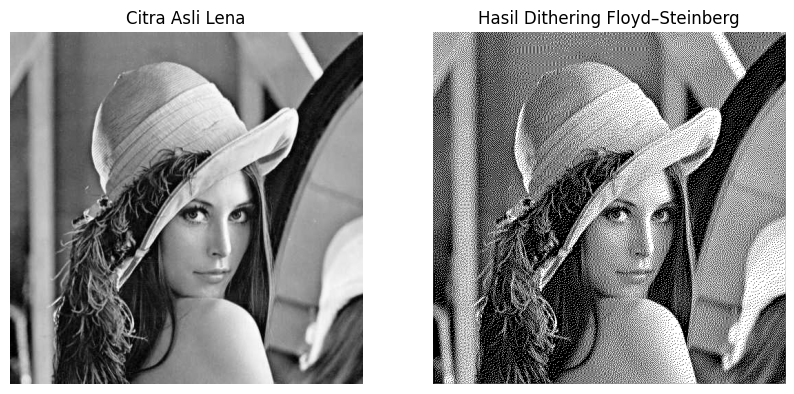

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1️⃣ Baca gambar Lena ===
img_path = '/content/drive/MyDrive/Pcvk/lena.jpg'  # ganti sesuai lokasi di Google Drive
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 2️⃣ Floyd-Steinberg Dithering ===
# Copy agar tidak ubah citra asli
dithered = gray.copy().astype(float)

for y in range(gray.shape[0]-1):
    for x in range(1, gray.shape[1]-1):
        old_pixel = dithered[y, x]
        new_pixel = 0 if old_pixel < 128 else 255
        dithered[y, x] = new_pixel
        error = old_pixel - new_pixel

        # Distribusi error Floyd–Steinberg
        dithered[y,   x+1] += error * 7/16
        dithered[y+1, x-1] += error * 3/16
        dithered[y+1, x]   += error * 5/16
        dithered[y+1, x+1] += error * 1/16

# Pastikan nilai pixel valid
dithered = np.clip(dithered, 0, 255).astype(np.uint8)

# === 3️⃣ Tampilkan hasil ===
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Asli Lena')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dithered, cmap='gray')
plt.title('Hasil Dithering Floyd–Steinberg')
plt.axis('off')
plt.show()


## Bagian 2 – Histogram Equalization + Dithering

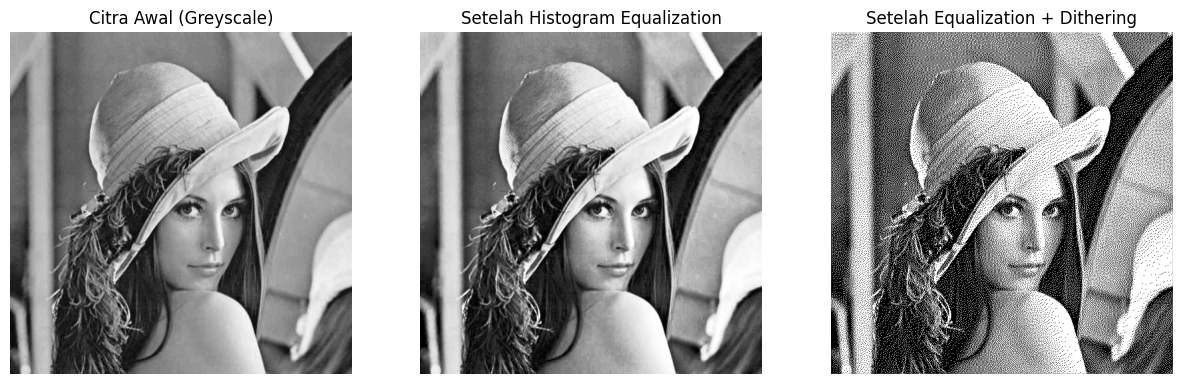

In [7]:
# === 1️⃣ Baca gambar lena_lc.jpg ===
img_path = '/content/drive/MyDrive/Pcvk/lena_lc.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 2️⃣ Histogram Equalization ===
equalized = cv2.equalizeHist(gray)

# === 3️⃣ Floyd–Steinberg Dithering ===
dithered_eq = equalized.copy().astype(float)

for y in range(equalized.shape[0]-1):
    for x in range(1, equalized.shape[1]-1):
        old_pixel = dithered_eq[y, x]
        new_pixel = 0 if old_pixel < 128 else 255
        dithered_eq[y, x] = new_pixel
        error = old_pixel - new_pixel

        dithered_eq[y,   x+1] += error * 7/16
        dithered_eq[y+1, x-1] += error * 3/16
        dithered_eq[y+1, x]   += error * 5/16
        dithered_eq[y+1, x+1] += error * 1/16

dithered_eq = np.clip(dithered_eq, 0, 255).astype(np.uint8)

# === 4️⃣ Tampilkan hasil ===
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Awal (Greyscale)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(equalized, cmap='gray')
plt.title('Setelah Histogram Equalization')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(dithered_eq, cmap='gray')
plt.title('Setelah Equalization + Dithering')
plt.axis('off')

plt.show()
